## 1. Setup and Import libraries

In [1]:
# django path
mysite_path = "C:\\Data\\UCL\\@MSc Project\\DB\\mysite\\"

In [2]:
# standard packages
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import django
from set_django_db import set_django_db
from asgiref.sync import sync_to_async

from IPython.core.display import HTML

%matplotlib inline

In [3]:
# set django models
set_django_db(mysite_path)
from tables_daniel.models import Company, Review

# specifically for Jupyter notebooks
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [4]:
# set pandas display
pd.set_option('display.max_rows', None)

In [5]:
# center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical_align: middle;
}
</style>
""")

## 2. Filter companies listed on FTSE 100

<hr>

Some information failed to scrape thus are filled manually on this place

In [6]:
companies = pd.DataFrame(
    list(
        Company
        .objects
        .values('id', 'Company', 'Country', 'Sector', 'Industry', 'NoEmployees', 'Revenue')
        .all()
        .filter(ListedOn='FTSE 100')
    )
)

In [7]:
companies['TotalReviews'] = 0

def sumReviews(row):
    try:
        return len(
            list(
                Review
                .objects
                .all()
                .filter(Company=companies.loc[row, 'id'])
            )
        )
    except:
        return 0


for row in range(companies.shape[0]):
    companies.loc[row, 'TotalReviews'] = sumReviews(row)

In [8]:
companies

,id,Company,Country,Sector,Industry,NoEmployees,Revenue,TotalReviews
0,551,3i,None,None,None,0,331000.0,10
1,552,Admiral Group,Ty Admiral,Financial Services,Insurance—Property & Casualty,11246,1360300.0,110
2,553,Anglo American plc,London SW1Y 5AN,Basic Materials,Other Industrial Metals & Mining,63000,29870000.0,70
3,554,Antofagasta,Cleveland House,Basic Materials,Copper,6532,4964500.0,6
4,555,Ashtead Group,London EC2V 6DT,Industrials,Rental & Leasing Services,19284,5053600.0,0
5,556,Associated British Foods,Weston Centre,Consumer Defensive,Packaged Foods,138000,15938000.0,20
6,557,AstraZeneca,Cambridge Biomedical Campus,Healthcare,Drug Manufacturers—General,70600,25247000.0,0
7,558,Auto Trader Group,4th Floor,Communication Services,Internet Content & Information,853,368900.0,30
8,559,Avast,Pikrtova 1737/1A,Technology,Software—Infrastructure,1792,871100.0,50
9,560,Aveva,High Cross,Technology,Software—Application,4600,833800.0,41


In [35]:
"""
company = Company.objects.get(Company='Pennon Group')

company.Country = 'United Kingdom'
company.Sector = 'Utilities'
company.Industry = 'Utilities—Regulated Water'

company.save()
"""

## 3. Company exploration

### 3.1 Companies per sector

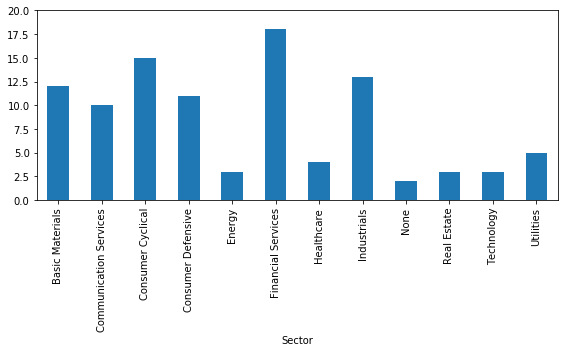

In [60]:
plt.figure(figsize=(8,5))

(companies
 .groupby('Sector')
 .count()
 .id
 .plot
 .bar()
)

plt.ylim(top = 20)

plt.tight_layout()

### 3.2 Companies per industry

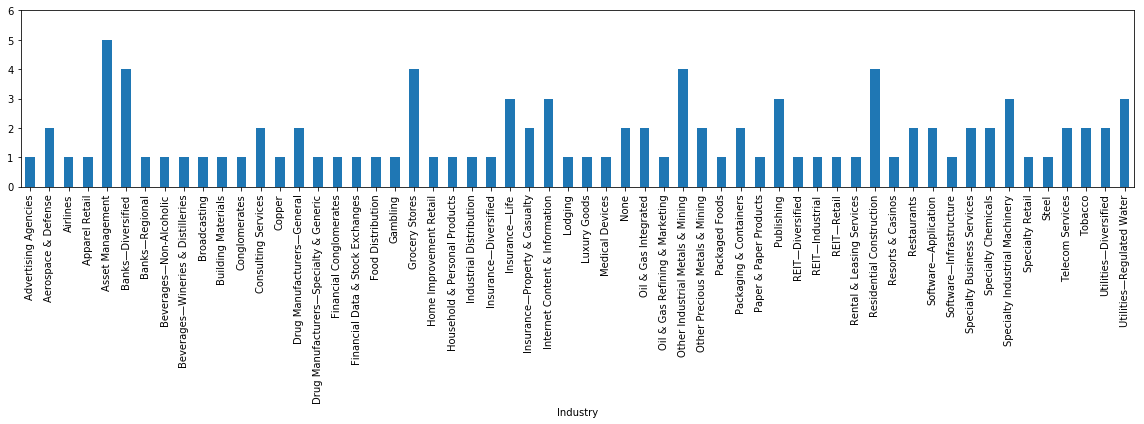

In [65]:
plt.figure(figsize=(16,6))

(companies
 .groupby('Industry')
 .count()
 .id
 .plot
 .bar()
)

plt.ylim(top = 6)

plt.tight_layout()